# Lab 9 - 01/12

Link github: https://github.com/ilariavascotto/UL_2023_fall

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from scipy.cluster import hierarchy
import myfunctions as f

## Ex 1

In [2]:
# Load data
iris = pd.read_csv("Datasets/iris.data", sep=",", header=None)
data = iris[[0,1,2,3]]
y = iris[[4]]
encoder = OrdinalEncoder()
y = encoder.fit_transform(np.array(y))

# Center data
data = f.center_data(data)

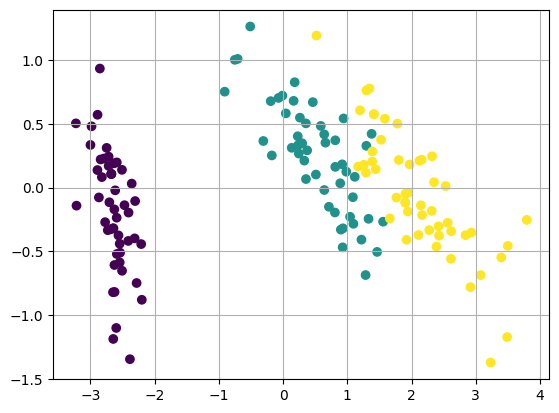

In [3]:
# PCA
pca_data = f.pca(data, 2)
plt.scatter(pca_data[:,0], pca_data[:,1], c = y)
plt.grid()
plt.show()

In [4]:
# Hierarchical clustering
single = hierarchy.linkage(data, method = 'single', metric = 'euclidean')
ward = hierarchy.linkage(data, method = 'ward', metric = 'euclidean')
single_labels = hierarchy.cut_tree(single, n_clusters = 3)
ward_labels = hierarchy.cut_tree(ward, n_clusters = 3)

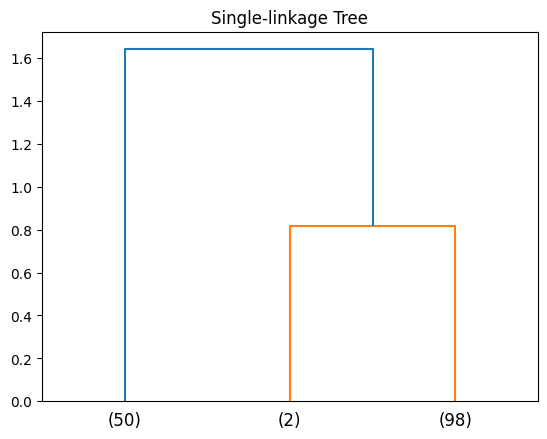

In [5]:
# Visualize dendrogram single-linkage
_ = hierarchy.dendrogram(single, p = 3, truncate_mode='lastp')
plt.title('Single-linkage Tree')
plt.show()

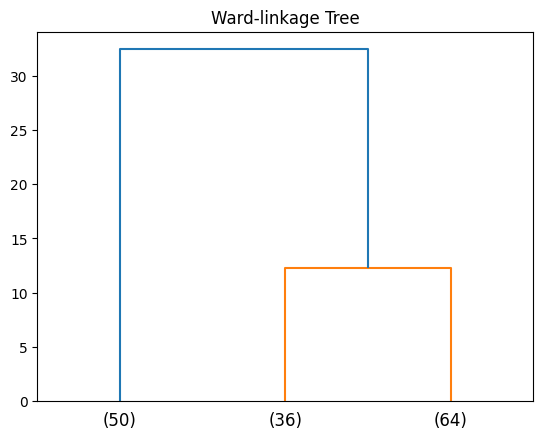

In [6]:
# Visualize dendrogram Ward-linkage
_ = hierarchy.dendrogram(ward, p = 3, truncate_mode='lastp')
plt.title('Ward-linkage Tree')
plt.show()

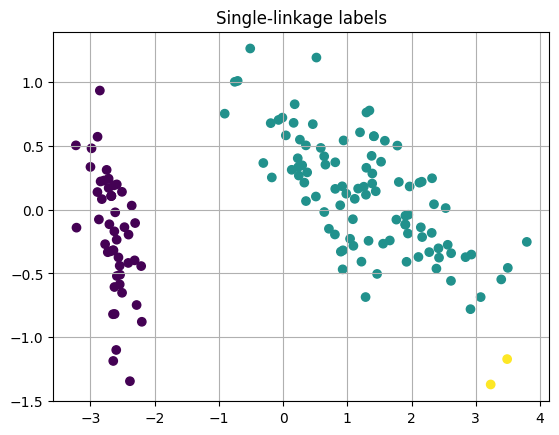

In [7]:
# Visualize clusters single_linkage
plt.title('Single-linkage labels')
plt.scatter(pca_data[:,0], pca_data[:,1], c=single_labels)
plt.grid()
plt.show()

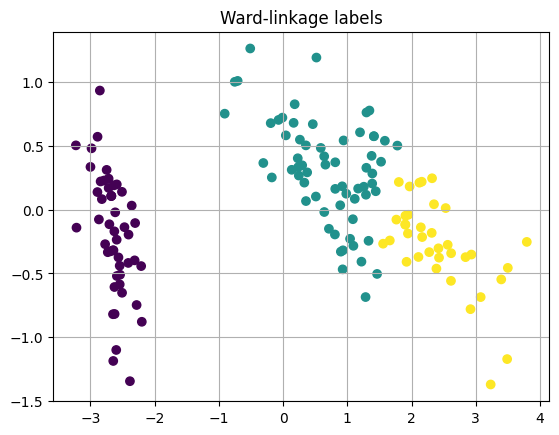

In [8]:
# Visualize clusters Ward_linkage
plt.title('Ward-linkage labels')
plt.scatter(pca_data[:,0], pca_data[:,1], c=ward_labels)
plt.grid()
plt.show()

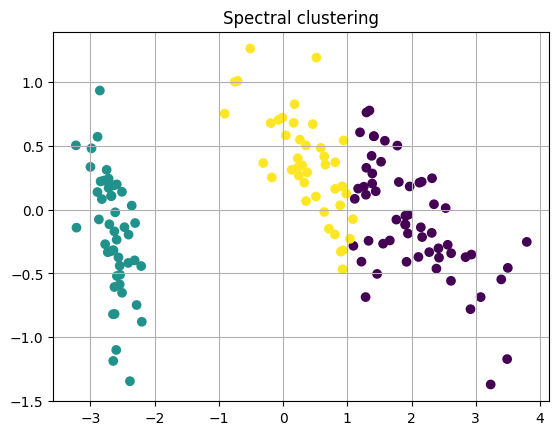

In [9]:
# Visualize spectral clusters
sp_labels, _ = f.spectral_clustering(data, n_neigh=5, k = 3, init = 'k++')
plt.title('Spectral clustering')
plt.scatter(pca_data[:,0], pca_data[:,1], c=sp_labels)
plt.grid()
plt.show()